objective 2

In [2]:
import pandas as pd
data=pd.read_csv('renewable.csv')
data

,GeoAreaName,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,54.24,54.06,43.77,42.28,49.84,40.86,37.14,33.86,21.34,17.85,14.90,11.56,14.40,17.11,20.36,19.96,24.34,24.65
1,Africa,60.46,59.79,59.30,58.61,58.58,57.42,57.22,56.24,55.99,55.91,56.10,56.13,55.38,54.50,54.32,54.60,54.57,54.38
2,Albania,41.45,39.13,35.90,33.75,35.93,36.87,31.71,32.10,35.91,37.22,37.11,35.96,40.05,41.29,38.69,38.61,39.56,37.19
3,Algeria,0.43,0.43,0.51,0.47,0.44,0.58,0.41,0.41,0.30,0.31,0.26,0.18,0.18,0.13,0.07,0.06,0.08,0.14
4,American Samoa,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.70,0.70,1.53,1.46,1.72,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,"Western Asia (exc. Armenia, Azerbaijan, Cyprus...",5.70,5.31,5.31,5.22,5.34,4.90,4.65,4.05,3.67,3.67,3.91,3.58,3.63,3.76,3.13,3.66,3.78,3.46
268,Western Europe,6.71,6.91,6.82,7.03,7.45,7.89,8.40,9.69,9.79,10.70,11.15,11.40,12.61,13.08,13.81,14.18,14.48,15.00
269,Yemen,1.15,1.07,1.06,0.93,0.91,0.89,0.93,0.94,0.90,0.86,0.96,1.14,1.33,0.93,0.94,2.35,4.00,4.85
270,Zambia,89.93,89.78,89.67,89.44,89.63,89.18,90.05,93.13,92.40,92.33,92.37,91.23,89.07,88.96,88.58,88.02,88.18,84.53


In [3]:
mean_year=pd.Series(data[1:].mean())
mean_year

2000    29.059145
2001    28.542639
2002    28.769926
2003    28.396171
2004    28.180929
2005    28.116815
2006    27.883148
2007    27.463370
2008    27.444037
2009    27.533222
2010    27.503704
2011    27.660755
2012    27.624060
2013    27.750940
2014    27.549436
2015    27.354774
2016    27.186842
2017    27.076955
dtype: float64

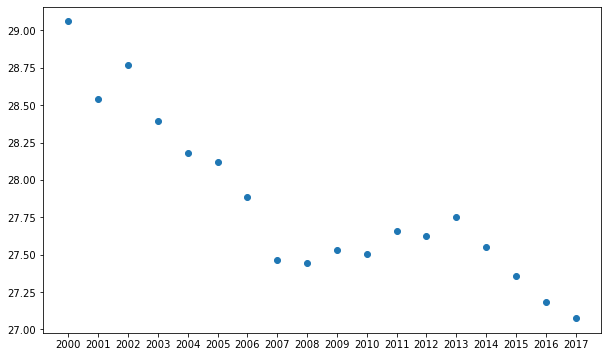

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(mean_year.index,mean_year)
plt.show()

In [5]:
table=pd.DataFrame(mean_year)
table.columns=['Mean (Y)']

In [6]:
table['X']=range(1,19)
table['XY']=table['Mean (Y)']*table['X']
table['X^2']=table['X']**2
table=pd.DataFrame(table)

In [7]:
sum=pd.DataFrame(table.sum())
sum.columns=['Sigma']
sum

mean=pd.DataFrame(table.mean())
mean.columns=['Mean']
mean

,Mean
Mean (Y),27.838715
X,9.500000
XY,261.968731
X^2,117.166667


In [8]:
table=pd.concat([table,sum.T,mean.T])
table

,Mean (Y),X,XY,X^2
2000,29.059145,1.0,29.059145,1.000000
2001,28.542639,2.0,57.085279,4.000000
2002,28.769926,3.0,86.309777,9.000000
2003,28.396171,4.0,113.584684,16.000000
2004,28.180929,5.0,140.904647,25.000000
2005,28.116815,6.0,168.700889,36.000000
2006,27.883148,7.0,195.182037,49.000000
2007,27.463370,8.0,219.706963,64.000000
2008,27.444037,9.0,246.996333,81.000000
2009,27.533222,10.0,275.332222,100.000000


In [9]:
numerator=table['XY'].loc['Sigma']-table['X'].loc['Sigma']*table['Mean (Y)'].loc['Sigma']/20
numerator

431.05891988180247

In [10]:
denominator=table['X^2'].loc['Sigma']-table['X'].loc['Sigma']**2/20
denominator

646.95

In [11]:
b=numerator/denominator
b

0.6662940256307326

In [12]:
def eq_regression(x):
    y=table['Mean (Y)'].loc['Mean']+b*(x-table['X'].loc['Mean'])
    return(y)

estimated Renewable energy share in the total final energy consumption for next 11 years [35.50109623591989, 36.16739026155062, 36.833684287181356, 37.49997831281209, 38.16627233844282, 38.83256636407356, 39.498860389704284, 40.16515441533502, 40.83144844096575, 41.497742466596485, 42.16403649222722, 42.830330517857945]


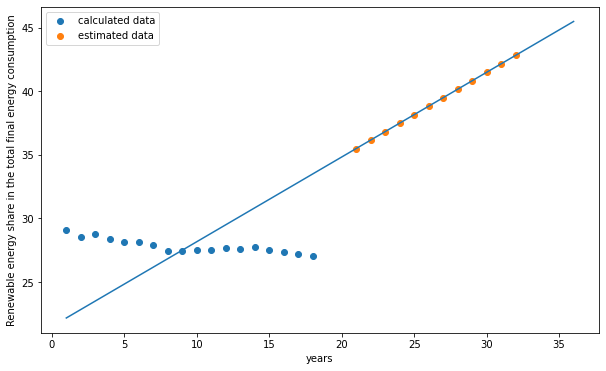

In [18]:
plt.figure(figsize=(10,6))
x_values=[]
y_values=[]
for x in range(21,33):
    x_values.append(x)
    y_values.append(eq_regression(x))
print("estimated Renewable energy share in the total final energy consumption for next 11 years",y_values)

aabbccdd=[]
for i in mean_year.index:
    aabbccdd.append(int(i)-1999)
plt.scatter(aabbccdd,mean_year,label='calculated data')
plt.scatter([range(21,33)],y_values,label='estimated data')
plt.legend()

y_line=[]
x_line=[]
for x in range(1,37):
    x_line.append(x)
    y_line.append(eq_regression(x))
plt.plot(x_line,y_line)
plt.xlabel("years")
plt.ylabel("Renewable energy share in the total final energy consumption")
plt.show()

In [ ]:
0.66629402563073,